#### 생선의 길이를 사용하여 무게를 예측

In [1]:
import numpy as np


In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이과 무게를 산포도로 표현

In [3]:
import matplotlib.pyplot as plt

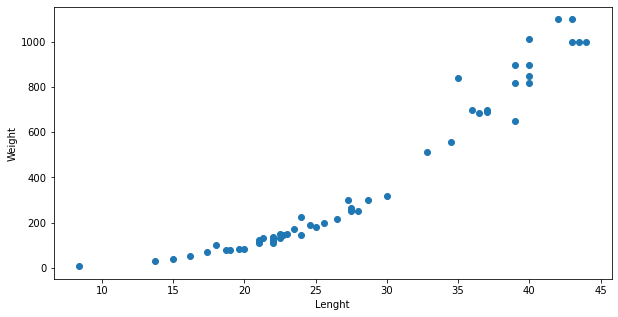

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(
    fish_length, # featuer
    fish_weight # target
)

plt.xlabel('Lenght')
plt.ylabel('Weight')
plt.show()

# Train Set, Test Set의 분리 

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input,test_input,train_target,test_target = \
    train_test_split(fish_length,fish_weight,random_state=42)

> KNN 분류에서 사용되었던 stratify는 분류 문제가 아니므로 사용하지 않는다.

In [7]:
# 분리된 결과 확인
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
# 1열로 구성된 배열로 재구성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


### 회귀모델 사용

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knr = KNeighborsRegressor()
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [17]:
knr.score(test_input,test_target)

0.992809406101064

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음
y값의 예측값에 수렴한다는 뜻이지 같다는것은 아님.
### 결정계수($R^2$) : 평균 절대값 오차
$R^2 = 1 - (타켓-예측)^2 의 합 \div (타켓-평균)^2 의 합$

In [19]:
from sklearn.metrics import mean_absolute_error

In [22]:
# 테스트 세트에 대한 예측을 만듦
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산
means = mean_absolute_error(test_target, test_prediction)
print(means)

19.157142857142862


### 과대적합(Overfitting)과 과소적합(Underfitting)

In [26]:
# train data로 score 측정
knr.score(train_input,train_target)

0.9698823289099254

In [27]:
# test data로 score 측정
knr.score(test_input,test_target)

0.992809406101064

> train보다 test의 정확도가 더 높게 나옴 -> 과소적합    
> 훈련이 잘못됨    
> 보통은 train 점수가 test의 점수보다 조금 더 잘나온 과대적합 기준으로 한다.

### knn의 Hyper Parameter를 조절

In [31]:
# 이웃의 갯수가 default는 5, 이웃의 갯수를 3으로 설정한다.
# 과소적합을 과대적합으로 만들려고 이웃의 갯수를 줄임
knr.n_neighbors = 3

# 모델 훈련
knr.fit(train_input,train_target)
print("train score",knr.score(train_input,train_target))
print("test score",knr.score(test_input,test_target))

train score 0.9804899950518966
test score 0.9746459963987609


In [34]:
# 이웃의 갯수가 default는 5, 이웃의 갯수를 11으로 설정한다.
knr.n_neighbors = 11

# 모델 훈련
knr.fit(train_input,train_target)
print("train score",knr.score(train_input,train_target))
print("test score",knr.score(test_input,test_target))

train score 0.9515761381539326
test score 0.970279643030474


---
# 이웃의 갯수 조절로 확인

K ====> 1
Train : 0.9852830341215901
Test : 0.991309195814175


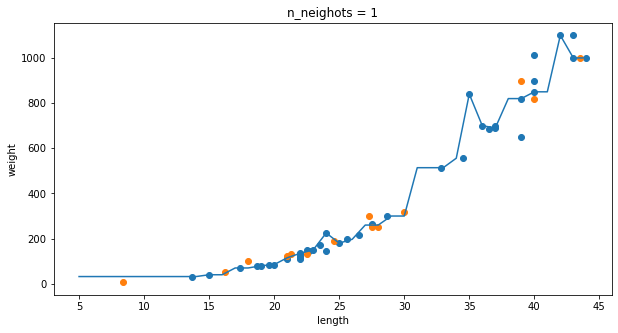

K ====> 3
Train : 0.9804899950518966
Test : 0.9746459963987609


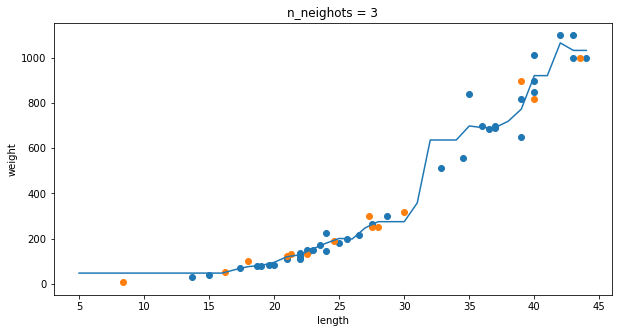

K ====> 5
Train : 0.9698823289099254
Test : 0.992809406101064


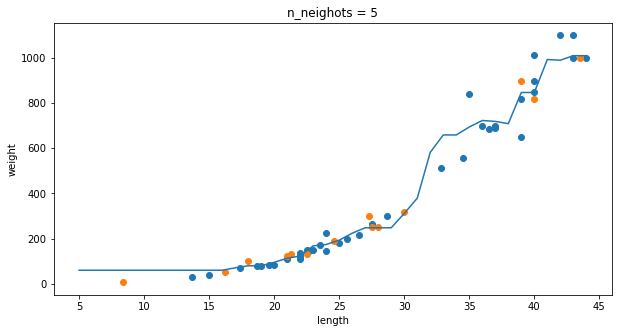

K ====> 10
Train : 0.96164569026043
Test : 0.9737908255822255


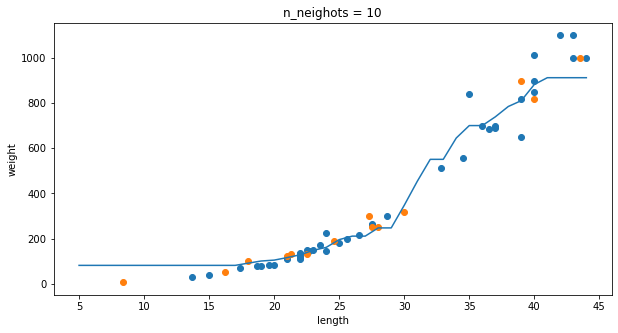

In [39]:
knr = KNeighborsRegressor()

# 5에서 45까지 x좌표를 만듦
x = np.arange(5, 45).reshape(-1,1)

# n = 1, 3, 5, 10 일때 예측 결과를 그래프로 그린다
for n in [1,3,5,10]:
    # 모델 훈력
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    print("K ====>",n)
    print("Train :",knr.score(train_input,train_target))
    print("Test :",knr.score(test_input,test_target))

    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)

    # 훈련 세트와 검증 세트의 예측결과 그래프 그리기
    plt.figure(figsize=(10,5))
    plt.scatter(train_input,train_target)
    plt.scatter(test_input,test_target)
    plt.plot(x,prediction)
    plt.title("n_neighots = %d"%n)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

> 일반화 성능이 잘되어있어야 쓸 수 있다.   
지금은 n_neighors = 3 인 경우가 잘 되어있다!!!